In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType
from pyspark.sql.functions import *

# Create a SparkSession
spark = SparkSession.builder.appName("YelpAnalysis").getOrCreate()

# Define schema with the new columns
schema = StructType([
    StructField("userId", StringType(), True),
    StructField("name", StringType(), True),  # Added name
    StructField("reviewCount", IntegerType(), True),
    StructField("avgStars", FloatType(), True),
    StructField("yelpingSinceFormatted", StringType(), True),
    StructField("useful", IntegerType(), True),
    StructField("funny", IntegerType(), True),
    StructField("cool", IntegerType(), True),
    StructField("eliteYears", IntegerType(), True),
    StructField("friendCount", IntegerType(), True),
    StructField("fans", IntegerType(), True),
    StructField("complimentHot", IntegerType(), True),
    StructField("complimentCool", IntegerType(), True),
    StructField("complimentFunny", IntegerType(), True),
    StructField("complimentMore", IntegerType(), True),
    StructField("complimentWriter", IntegerType(), True), # Changed to IntegerType
    StructField("complimentPlain", IntegerType(), True),
    StructField("complimentPhotos", IntegerType(), True),
    StructField("complimentNote", IntegerType(), True), # Changed to IntegerType
])

# Load data (LOCAL path)
data = spark.read.csv("processed_dataset/user-r-00000", sep="\t", schema=schema)  # Assuming your local file is named 'part-r-00000'


In [3]:
file_paths = [
    "processed_dataset/review0-r-00000",
    "processed_dataset/review1-r-00000",
    "processed_dataset/review2-r-00000",
    "processed_dataset/review3-r-00000",
    "processed_dataset/review4-r-00000",
    "processed_dataset/review5-r-00000",
    "processed_dataset/review6-r-00000",
    "processed_dataset/review7-r-00000",
    "processed_dataset/review8-r-00000",
    "processed_dataset/review9-r-00000",
    "processed_dataset/review10-r-00000",
    "processed_dataset/review11-r-00000"
]

# Load all 12 text files into one DataFrame (assuming they have the same schema)
df_review = spark.read.option("delimiter", "\t").csv(file_paths, header=False, inferSchema=True)

In [4]:
# Manually set column names
df_review = df_review.toDF('review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date')

In [21]:
# Assuming 'data' is a Spark DataFrame
top_reviewers = data.orderBy(desc("reviewCount")).select("userId", "name", "reviewCount").limit(10)

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = top_reviewers.toPandas()

# Save Pandas DataFrame to CSV
csv_file_path = "top_reviewers.csv"
pandas_df.to_csv(csv_file_path, index=False)  # index=False prevents writing row indices

print(f"Top reviewers data saved to {csv_file_path}")

Top reviewers data saved to top_reviewers.csv


In [22]:
# Assuming 'data' is your Spark DataFrame
result = data.groupBy(floor("avgStars")).count().orderBy("floor(avgStars)")
result.show()

# Convert to Pandas DataFrame
pandas_df = result.toPandas()

# Save to CSV
csv_file_path = "avg_stars_counts.csv"
pandas_df.to_csv(csv_file_path, index=False)

print(f"Grouped avgStars data saved to {csv_file_path}")

+---------------+------+
|FLOOR(avgStars)| count|
+---------------+------+
|              1|216069|
|              2|221034|
|              3|611500|
|              4|582926|
|              5|356368|
+---------------+------+

Grouped avgStars data saved to avg_stars_counts.csv


In [ ]:
# # import matplotlib.pyplot as plt

# review_counts = data.select("reviewCount").toPandas()
# plt.hist(review_counts["reviewCount"], bins=20)
# plt.xlabel("Review Count")
# plt.ylabel("Frequency")
# plt.title("Distribution of Review Counts")
# plt.show()

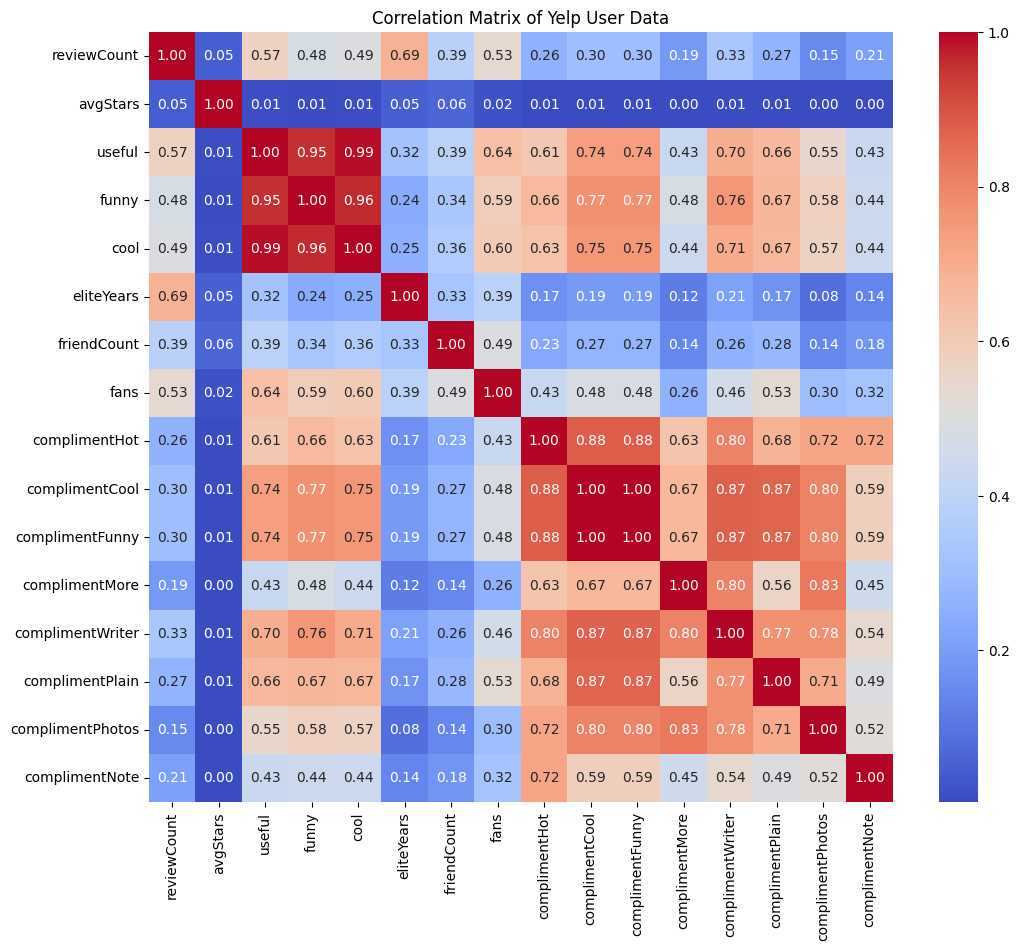

Correlation matrix data saved to correlation_matrix_data.csv
Columns used for correlation saved to correlation_columns.csv


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your Spark DataFrame

# Select numerical columns from your PySpark DataFrame
numeric_cols = ["reviewCount", "avgStars", "useful", "funny", "cool", "eliteYears", "friendCount", "fans",
                 "complimentHot", "complimentCool", "complimentFunny", "complimentMore", "complimentWriter",
                 "complimentPlain", "complimentPhotos", "complimentNote"]  # Add other numerical columns

numeric_data = data.select(numeric_cols).toPandas()

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Create heatmap visualization
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")  # fmt=".2f" for 2 decimal places
plt.title("Correlation Matrix of Yelp User Data")
plt.show()

# Save the correlation matrix data to a CSV file
correlation_matrix.to_csv("correlation_matrix_data.csv")

# Save the columns to a CSV file
columns_df = pd.DataFrame({'columns': numeric_cols})
columns_df.to_csv("correlation_columns.csv", index=False)

print("Correlation matrix data saved to correlation_matrix_data.csv")
print("Columns used for correlation saved to correlation_columns.csv")

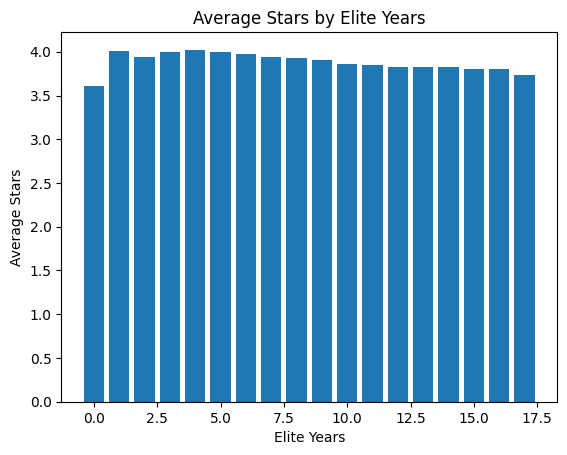

Average stars by elite years data saved to avg_stars_by_elite.csv


In [24]:
# Assuming 'data' is your Spark DataFrame
avg_stars_by_elite = data.groupBy("eliteYears").agg(avg("avgStars").alias("avg_stars")).toPandas()

plt.bar(avg_stars_by_elite["eliteYears"], avg_stars_by_elite["avg_stars"])
plt.xlabel("Elite Years")
plt.ylabel("Average Stars")
plt.title("Average Stars by Elite Years")
plt.show()

# Save the data to a CSV file
csv_file_path = "avg_stars_by_elite.csv"
avg_stars_by_elite.to_csv(csv_file_path, index=False)

print(f"Average stars by elite years data saved to {csv_file_path}")

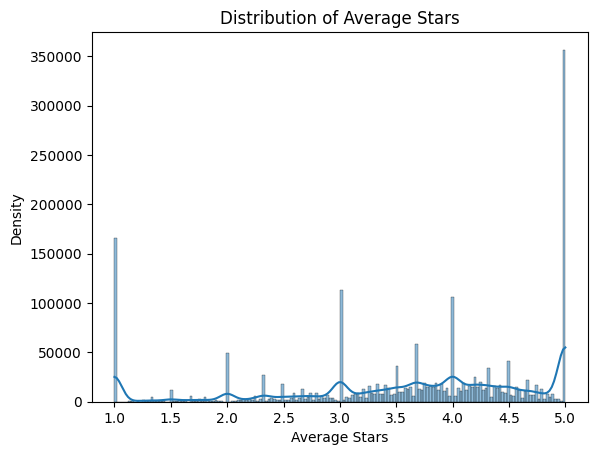

Average stars data saved to avg_stars_distribution.csv


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your Spark DataFrame

avg_stars = data.select("avgStars").toPandas()
sns.histplot(avg_stars["avgStars"], kde=True)
plt.xlabel("Average Stars")
plt.ylabel("Density")
plt.title("Distribution of Average Stars")
plt.show()

# Save the data to a CSV file (optional, but recommended)
csv_file_path = "avg_stars_distribution.csv"
avg_stars.to_csv(csv_file_path, index=False)

print(f"Average stars data saved to {csv_file_path}")

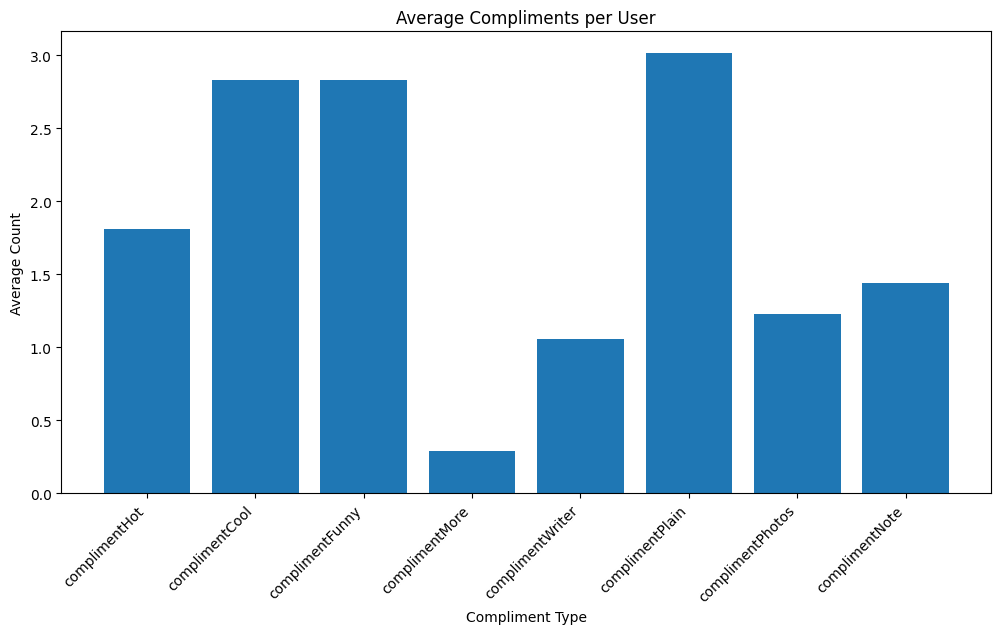

Average compliments data saved to average_compliments.csv


In [26]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import avg
import pandas as pd

# Assuming 'data' is your Spark DataFrame

compliment_cols = ["complimentHot", "complimentCool", "complimentFunny", "complimentMore", "complimentWriter", "complimentPlain", "complimentPhotos", "complimentNote"]
compliment_avgs = {col: data.agg(avg(col)).collect()[0][0] for col in compliment_cols}

plt.figure(figsize=(12, 6))
plt.bar(compliment_avgs.keys(), compliment_avgs.values())
plt.xticks(rotation=45, ha="right")
plt.xlabel("Compliment Type")
plt.ylabel("Average Count")
plt.title("Average Compliments per User")
plt.show()

# Convert the dictionary to a Pandas DataFrame
compliment_df = pd.DataFrame(list(compliment_avgs.items()), columns=['Compliment Type', 'Average Count'])

# Save the DataFrame to a CSV file
csv_file_path = "average_compliments.csv"
compliment_df.to_csv(csv_file_path, index=False)

print(f"Average compliments data saved to {csv_file_path}")

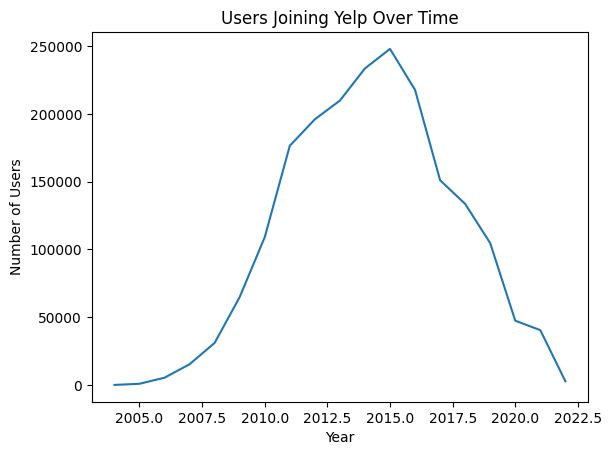

Yelp users joining over time data saved to yelp_users_joining_over_time.csv


In [27]:
from pyspark.sql.functions import year, to_date, col
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your Spark DataFrame

# Convert date format
data = data.withColumn(
    "yelpingSinceDate",
    to_date(col("yelpingSinceFormatted"), "dd-MM-yyyy")
)

# Users Joining Yelp Over Time (using the converted date)
yelping_years = data.groupBy(year("yelpingSinceDate").alias("yelpingYear")).count().orderBy("yelpingYear").toPandas()

plt.plot(yelping_years["yelpingYear"], yelping_years["count"])
plt.xlabel("Year")
plt.ylabel("Number of Users")
plt.title("Users Joining Yelp Over Time")
plt.show()

# Save the data to a CSV file
csv_file_path = "yelp_users_joining_over_time.csv"
yelping_years.to_csv(csv_file_path, index=False)

print(f"Yelp users joining over time data saved to {csv_file_path}")

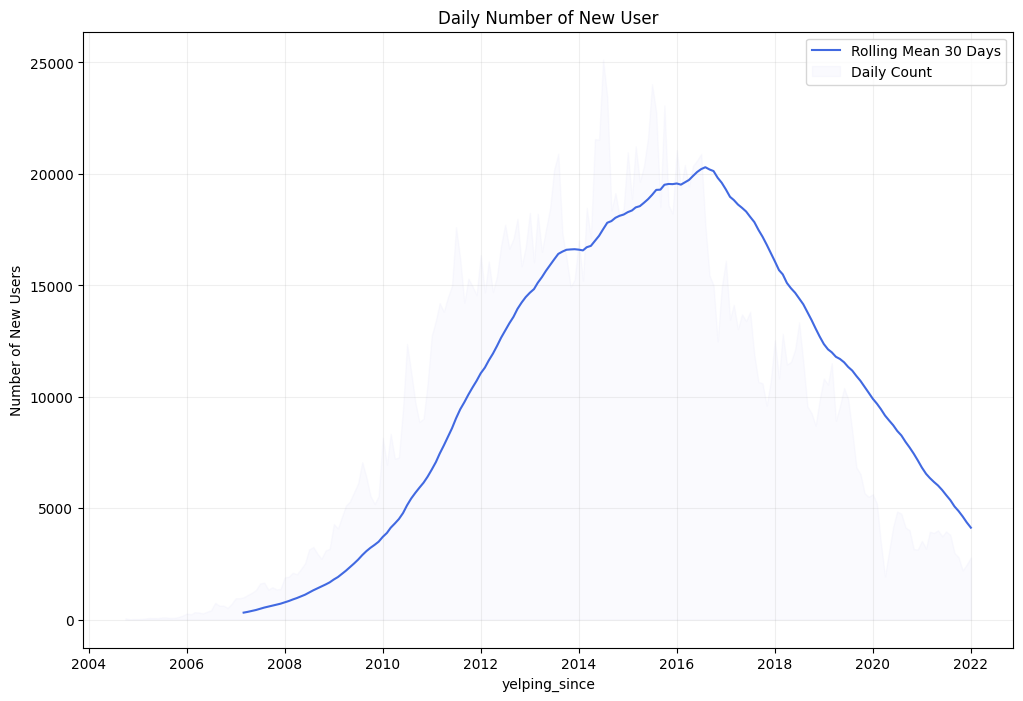

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Group by date and count new users
daily_user_counts = data.groupBy("yelpingSinceDate").count().orderBy("yelpingSinceDate")

# Convert to Pandas DataFrame
pandas_df = daily_user_counts.toPandas()

# Calculate 30-day rolling mean
pandas_df["rolling_mean"] = pandas_df["count"].rolling(window=30).mean()

# Plot the data
plt.figure(figsize=(12, 8))

plt.plot(pandas_df["yelpingSinceDate"], pandas_df["rolling_mean"], label="Rolling Mean 30 Days", color="royalblue")
plt.fill_between(pandas_df["yelpingSinceDate"], pandas_df["count"], alpha=0.2, label="Daily Count", color="lavender")

plt.xlabel("yelping_since")
plt.ylabel("Number of New Users")
plt.title("Daily Number of New User")
plt.legend()
plt.grid(alpha=0.2)
plt.show()

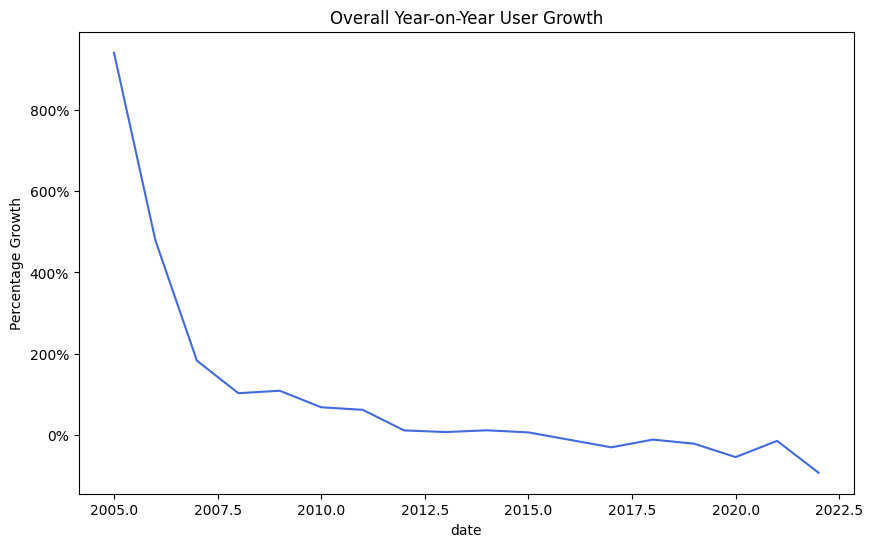

Yearly user growth data saved to yearly_user_growth.csv


In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Assuming 'data' is your Spark DataFrame

# Extract the year from yelpingSinceDate
data = data.withColumn("yelpingYear", F.year("yelpingSinceDate"))

# Group by year and count users
yearly_user_counts = data.groupBy("yelpingYear").count().orderBy("yelpingYear")

# Convert to Pandas DataFrame
pandas_df = yearly_user_counts.toPandas()

# Calculate year-on-year growth
pandas_df["growth"] = pandas_df["count"].pct_change() * 100

# Remove the first row (NaN growth)
pandas_df = pandas_df.dropna()

# Plot the data
plt.figure(figsize=(10, 6))

plt.plot(pandas_df["yelpingYear"], pandas_df["growth"], color="royalblue")

plt.xlabel("date")  # or "Year"
plt.ylabel("Percentage Growth")
plt.title("Overall Year-on-Year User Growth")

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))

plt.show()

# Save the data to a CSV file
csv_file_path = "yearly_user_growth.csv"
pandas_df.to_csv(csv_file_path, index=False)

print(f"Yearly user growth data saved to {csv_file_path}")

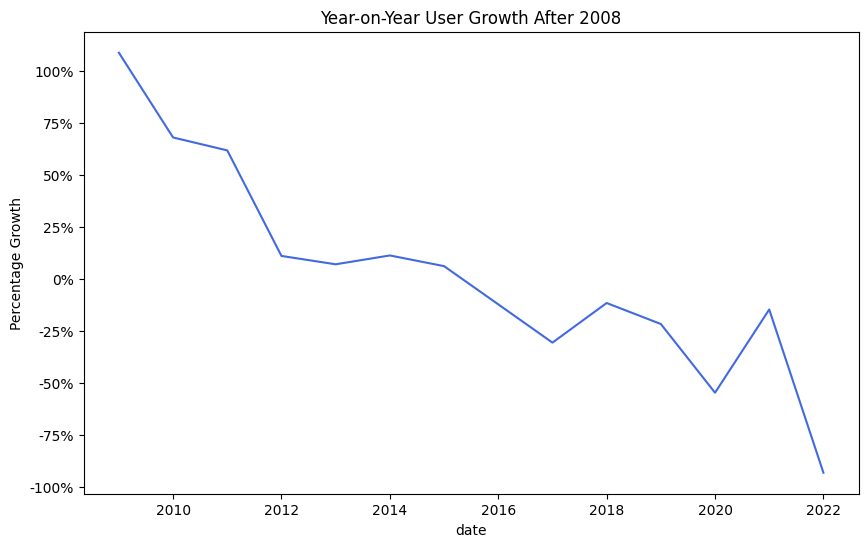

Yearly user growth after 2008 data saved to yearly_user_growth_after_2008.csv


In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Assuming 'data' is your Spark DataFrame

# Extract the year from yelpingSinceDate
data = data.withColumn("yelpingYear", F.year("yelpingSinceDate"))

# Group by year and count users
yearly_user_counts = data.groupBy("yelpingYear").count().orderBy("yelpingYear")

# Convert to Pandas DataFrame
pandas_df = yearly_user_counts.toPandas()

# Calculate year-on-year growth
pandas_df["growth"] = pandas_df["count"].pct_change() * 100

# Remove the first row (NaN growth)
pandas_df = pandas_df.dropna()

# Filter for years after 2008
pandas_df = pandas_df[pandas_df["yelpingYear"] > 2008]

# Plot the data
plt.figure(figsize=(10, 6))

plt.plot(pandas_df["yelpingYear"], pandas_df["growth"], color="royalblue")

plt.xlabel("date")  # or "Year"
plt.ylabel("Percentage Growth")
plt.title("Year-on-Year User Growth After 2008")

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))

plt.show()

# Save the data to a CSV file
csv_file_path = "yearly_user_growth_after_2008.csv"
pandas_df.to_csv(csv_file_path, index=False)

print(f"Yearly user growth after 2008 data saved to {csv_file_path}")

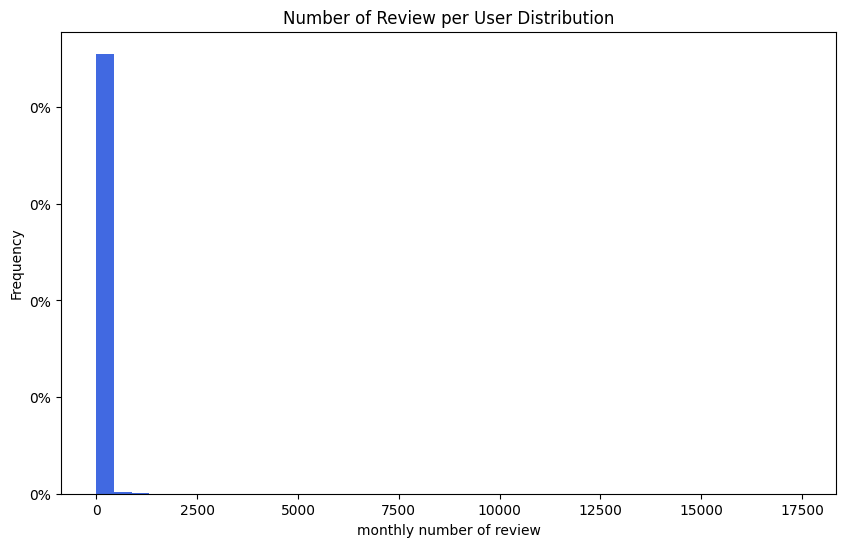

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Select the reviewCount column
review_counts = data.select("reviewCount").toPandas()

# Create histogram
plt.figure(figsize=(10, 6))

plt.hist(review_counts["reviewCount"], bins=40, color="royalblue", density=True)  # bins and density can be adjusted

plt.xlabel("monthly number of review")  # Adjust label as needed
plt.ylabel("Frequency")
plt.title("Number of Review per User Distribution")

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

plt.show()

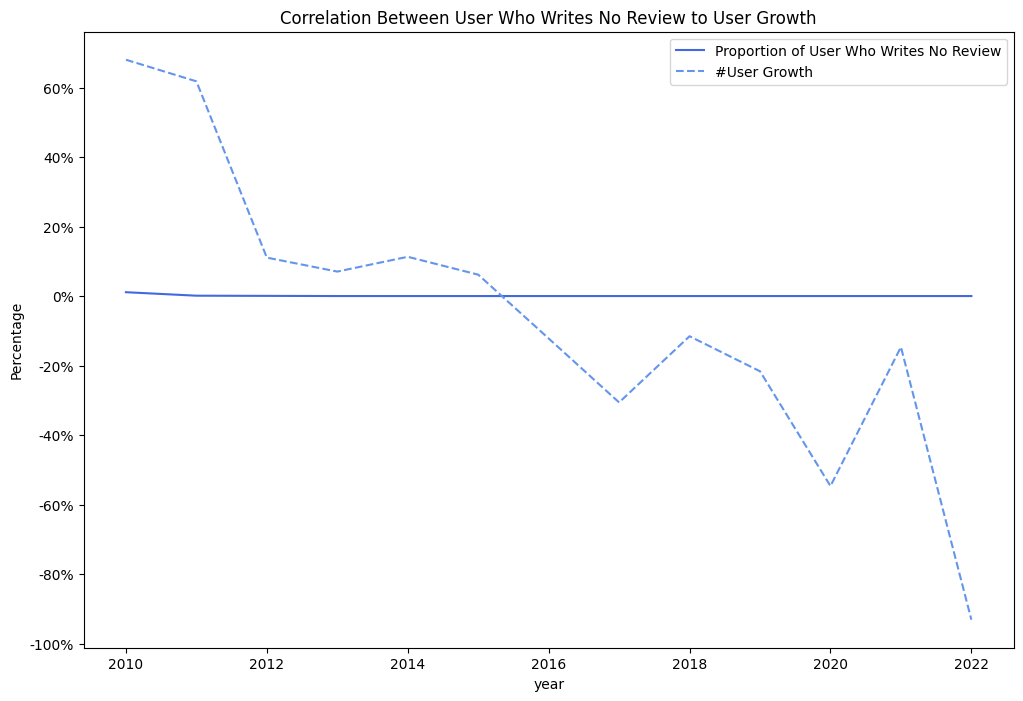

No review vs. user growth data saved to no_review_vs_user_growth.csv


In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Assuming 'data' is your Spark DataFrame

# Extract the year from yelpingSinceDate
data = data.withColumn("yelpingYear", F.year("yelpingSinceDate"))

# Calculate proportion of users with no reviews
no_review_users = data.filter(F.col("reviewCount") == 0)
yearly_no_review_counts = no_review_users.groupBy("yelpingYear").count().orderBy("yelpingYear")
yearly_total_users = data.groupBy("yelpingYear").count().orderBy("yelpingYear")

pandas_no_review = yearly_no_review_counts.toPandas()
pandas_total_users = yearly_total_users.toPandas()

pandas_no_review["proportion"] = pandas_no_review["count"] / pandas_total_users["count"] * 100

# Calculate year-on-year user growth
pandas_total_users["growth"] = pandas_total_users["count"].pct_change() * 100
pandas_total_users = pandas_total_users.dropna()

# Merge dataframes
merged_df = pd.merge(pandas_no_review[["yelpingYear", "proportion"]], pandas_total_users[["yelpingYear", "growth"]], on="yelpingYear")

# Filter for years after 2008
merged_df = merged_df[merged_df["yelpingYear"] >= 2008]

# Plot the data
plt.figure(figsize=(12, 8))

plt.plot(merged_df["yelpingYear"], merged_df["proportion"], label="Proportion of User Who Writes No Review", color="royalblue")
plt.plot(merged_df["yelpingYear"], merged_df["growth"], label="#User Growth", color="cornflowerblue", linestyle="--")

plt.xlabel("year")
plt.ylabel("Percentage")
plt.title("Correlation Between User Who Writes No Review to User Growth")

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))

plt.legend()
plt.show()

# Save the data to a CSV file
csv_file_path = "no_review_vs_user_growth.csv"
merged_df.to_csv(csv_file_path, index=False)

print(f"No review vs. user growth data saved to {csv_file_path}")

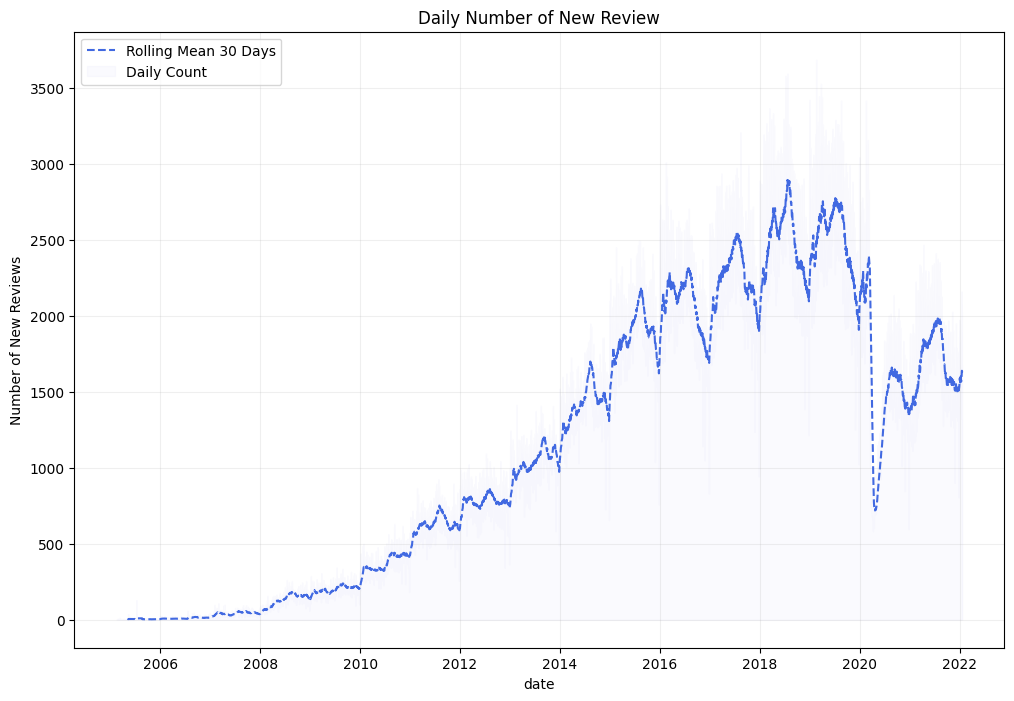

Daily new reviews and rolling mean data saved to daily_new_reviews_rolling_mean.csv


In [32]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Assuming 'df_review' is your Spark DataFrame

# Assuming your date column is named 'date' and is of StringType
# Convert date string to date type for proper grouping and ordering
df_review = df_review.withColumn("date", F.to_date(F.col("date"), "dd-MM-yyyy"))

# Group by date and count reviews
daily_review_counts = df_review.groupBy("date").count().orderBy("date")

# Convert to Pandas DataFrame
pandas_df = daily_review_counts.toPandas()

# Calculate 30-day rolling mean
pandas_df["rolling_mean"] = pandas_df["count"].rolling(window=30).mean()

# Plot the data
plt.figure(figsize=(12, 8))

plt.plot(pandas_df["date"], pandas_df["rolling_mean"], label="Rolling Mean 30 Days", color="royalblue", linestyle="--")
plt.fill_between(pandas_df["date"], pandas_df["count"], alpha=0.2, label="Daily Count", color="lavender")

plt.xlabel("date")
plt.ylabel("Number of New Reviews")
plt.title("Daily Number of New Review")

plt.legend()
plt.grid(alpha=0.2)
plt.show()

# Save the data to a CSV file
csv_file_path = "daily_new_reviews_rolling_mean.csv"
pandas_df.to_csv(csv_file_path, index=False)

print(f"Daily new reviews and rolling mean data saved to {csv_file_path}")

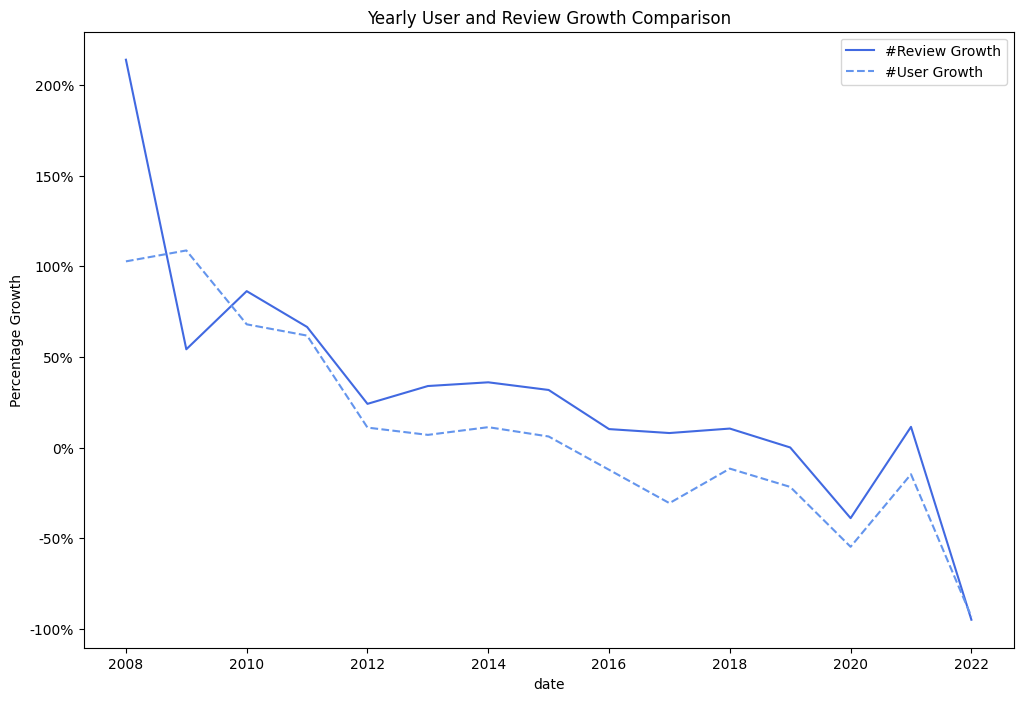

Yearly user and review growth comparison data saved to yearly_user_review_growth_comparison.csv


In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Assuming 'data' and 'df_review' are your Spark DataFrames

# Extract the year from yelpingSinceDate (users)
data = data.withColumn("yelpingYear", F.year("yelpingSinceDate"))

# Extract the year from the review date (reviews)
df_review = df_review.withColumn("reviewYear", F.year(F.to_date(F.col("date"), "dd-MM-yyyy")))

# Group by year and count users
yearly_user_counts = data.groupBy("yelpingYear").count().orderBy("yelpingYear")

# Group by year and count reviews
yearly_review_counts = df_review.groupBy("reviewYear").count().orderBy("reviewYear")

# Convert to Pandas DataFrames
pandas_users = yearly_user_counts.toPandas()
pandas_reviews = yearly_review_counts.toPandas()

# Calculate year-on-year user growth
pandas_users["user_growth"] = pandas_users["count"].pct_change() * 100
pandas_users = pandas_users.dropna()

# Calculate year-on-year review growth
pandas_reviews["review_growth"] = pandas_reviews["count"].pct_change() * 100
pandas_reviews = pandas_reviews.dropna()

# Merge DataFrames
merged_df = pd.merge(pandas_users[["yelpingYear", "user_growth"]], pandas_reviews[["reviewYear", "review_growth"]], left_on="yelpingYear", right_on="reviewYear")

# Filter for years after 2008
merged_df = merged_df[merged_df["yelpingYear"] >= 2008]

# Plot the data
plt.figure(figsize=(12, 8))

plt.plot(merged_df["yelpingYear"], merged_df["review_growth"], label="#Review Growth", color="royalblue")
plt.plot(merged_df["yelpingYear"], merged_df["user_growth"], label="#User Growth", color="cornflowerblue", linestyle="--")

plt.xlabel("date")
plt.ylabel("Percentage Growth")
plt.title("Yearly User and Review Growth Comparison")

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))

plt.legend()
plt.show()

# Save the data to a CSV file
csv_file_path = "yearly_user_review_growth_comparison.csv"
merged_df.to_csv(csv_file_path, index=False)

print(f"Yearly user and review growth comparison data saved to {csv_file_path}")

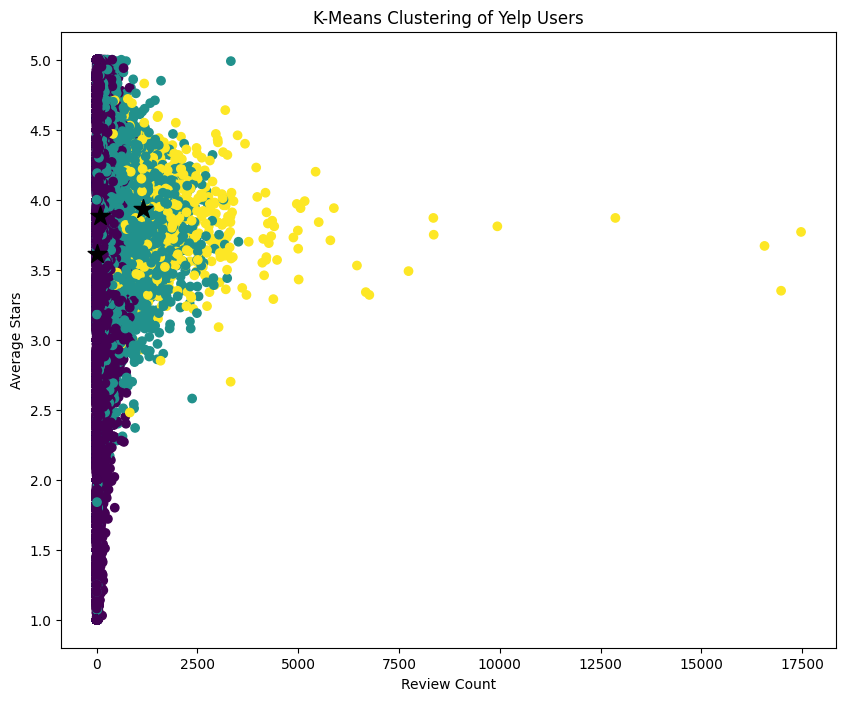

K-Means predictions saved to kmeans_predictions.csv
K-Means cluster centers saved to kmeans_cluster_centers.csv


In [34]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your Spark DataFrame

# Feature Selection
feature_cols = ["reviewCount", "avgStars", "friendCount", "fans"]

# Vector Assembly
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
assembled_data = assembler.transform(data)

# Scaling
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaled_data = scaler.fit(assembled_data).transform(assembled_data)

# K-Means Model
kmeans = KMeans(k=3, seed=1)  # Choose k = 3 (number of clusters)
model = kmeans.fit(scaled_data)
predictions = model.transform(scaled_data)

# Extract Cluster Centers
centers = model.clusterCenters()

# Visualization (Scatter Plot)
pandas_df = predictions.select(feature_cols + ["prediction"]).toPandas()

plt.figure(figsize=(10, 8))

# Scatter plot of data points, colored by cluster
plt.scatter(
    pandas_df["reviewCount"],  # X-axis (adjust as needed)
    pandas_df["avgStars"],    # Y-axis (adjust as needed)
    c=pandas_df["prediction"],
    cmap="viridis",
)

# Scatter plot of cluster centers
plt.scatter(
    [center[0] for center in centers],  # X-coordinates of centers
    [center[1] for center in centers],  # Y-coordinates of centers
    marker="*",
    s=200,
    c="black",
)

plt.xlabel("Review Count")  # Adjust labels as needed
plt.ylabel("Average Stars")
plt.title("K-Means Clustering of Yelp Users")
plt.show()

# Save the predictions and cluster centers to CSV files
predictions_csv_path = "kmeans_predictions.csv"
centers_csv_path = "kmeans_cluster_centers.csv"

pandas_df.to_csv(predictions_csv_path, index=False)

centers_df = pd.DataFrame(centers, columns=feature_cols)
centers_df.to_csv(centers_csv_path, index=False)

print(f"K-Means predictions saved to {predictions_csv_path}")
print(f"K-Means cluster centers saved to {centers_csv_path}")